In [46]:
#!pip install Pillow

In [47]:
from PIL import Image
import numpy as np

In [48]:
img = Image.open('korgi2.jpg')

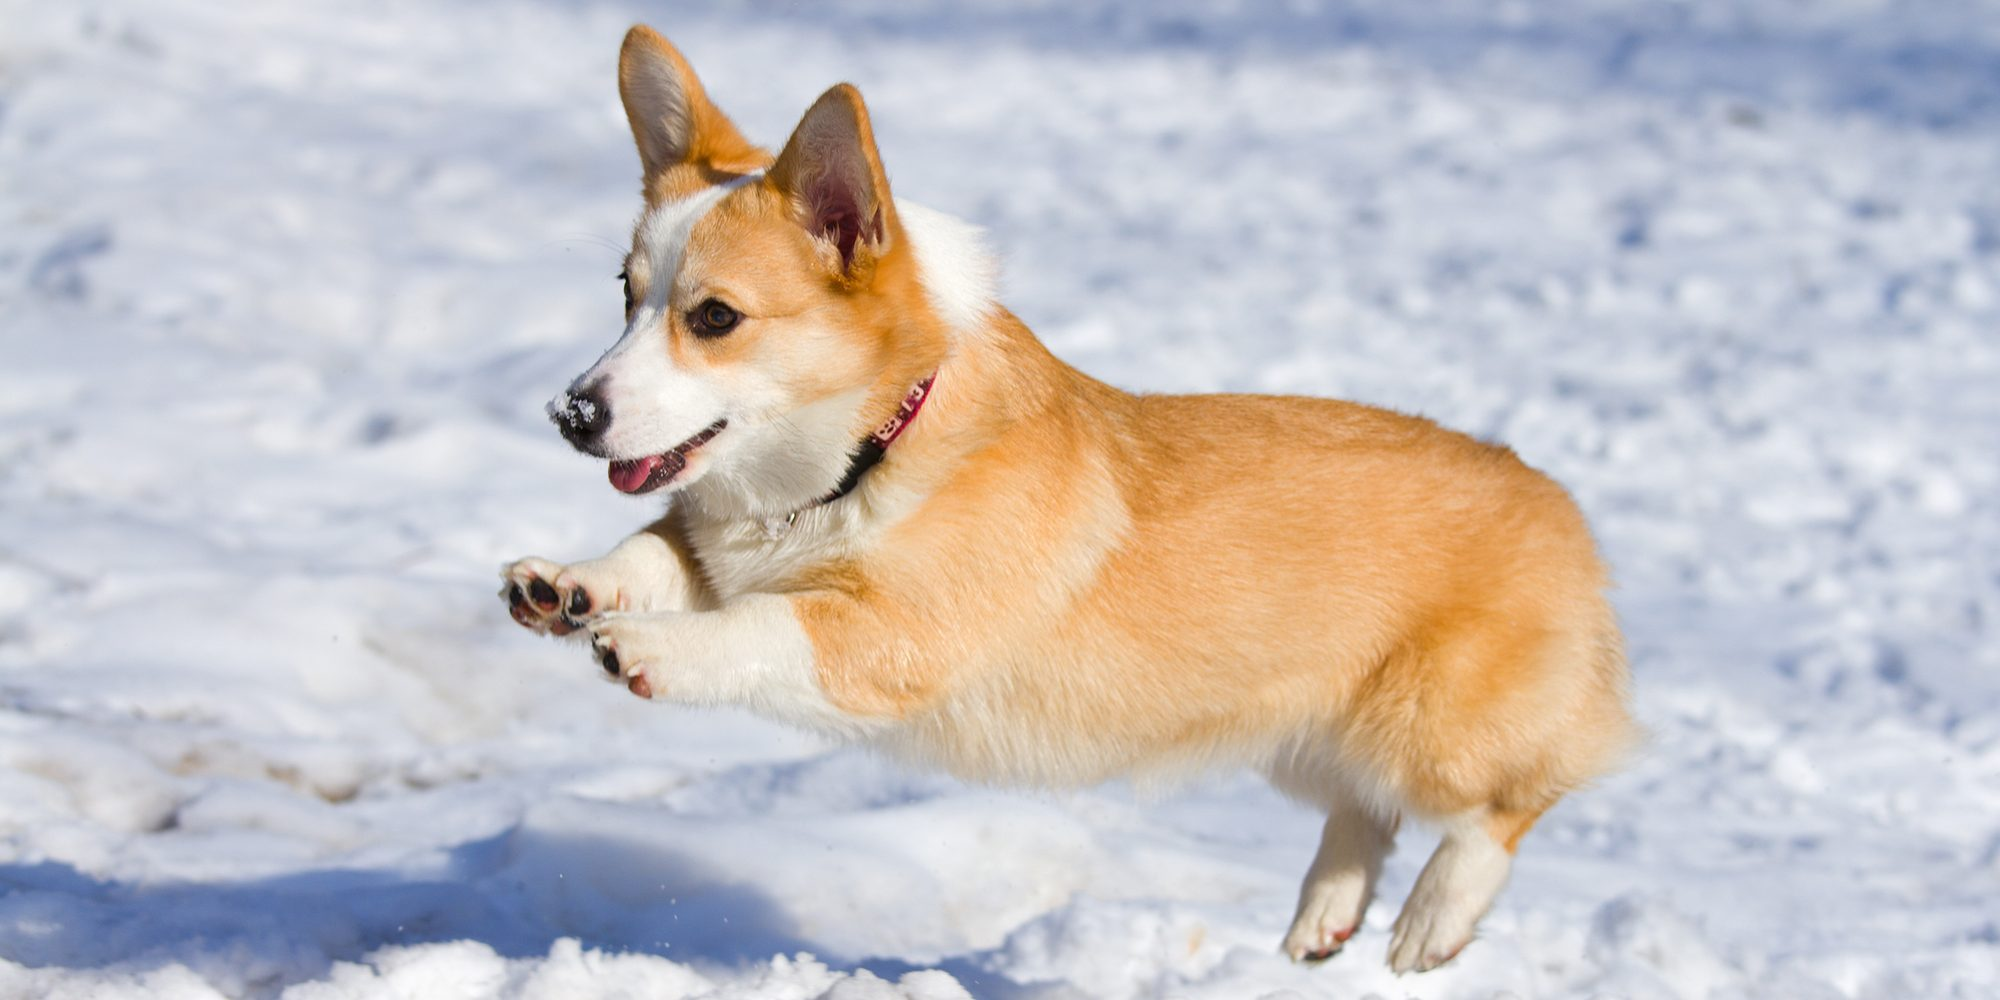

In [49]:
img

In [50]:
x = np.array(img, dtype=np.float32)
x.dtype

dtype('float32')

In [51]:
x.shape

(1000, 2000, 3)

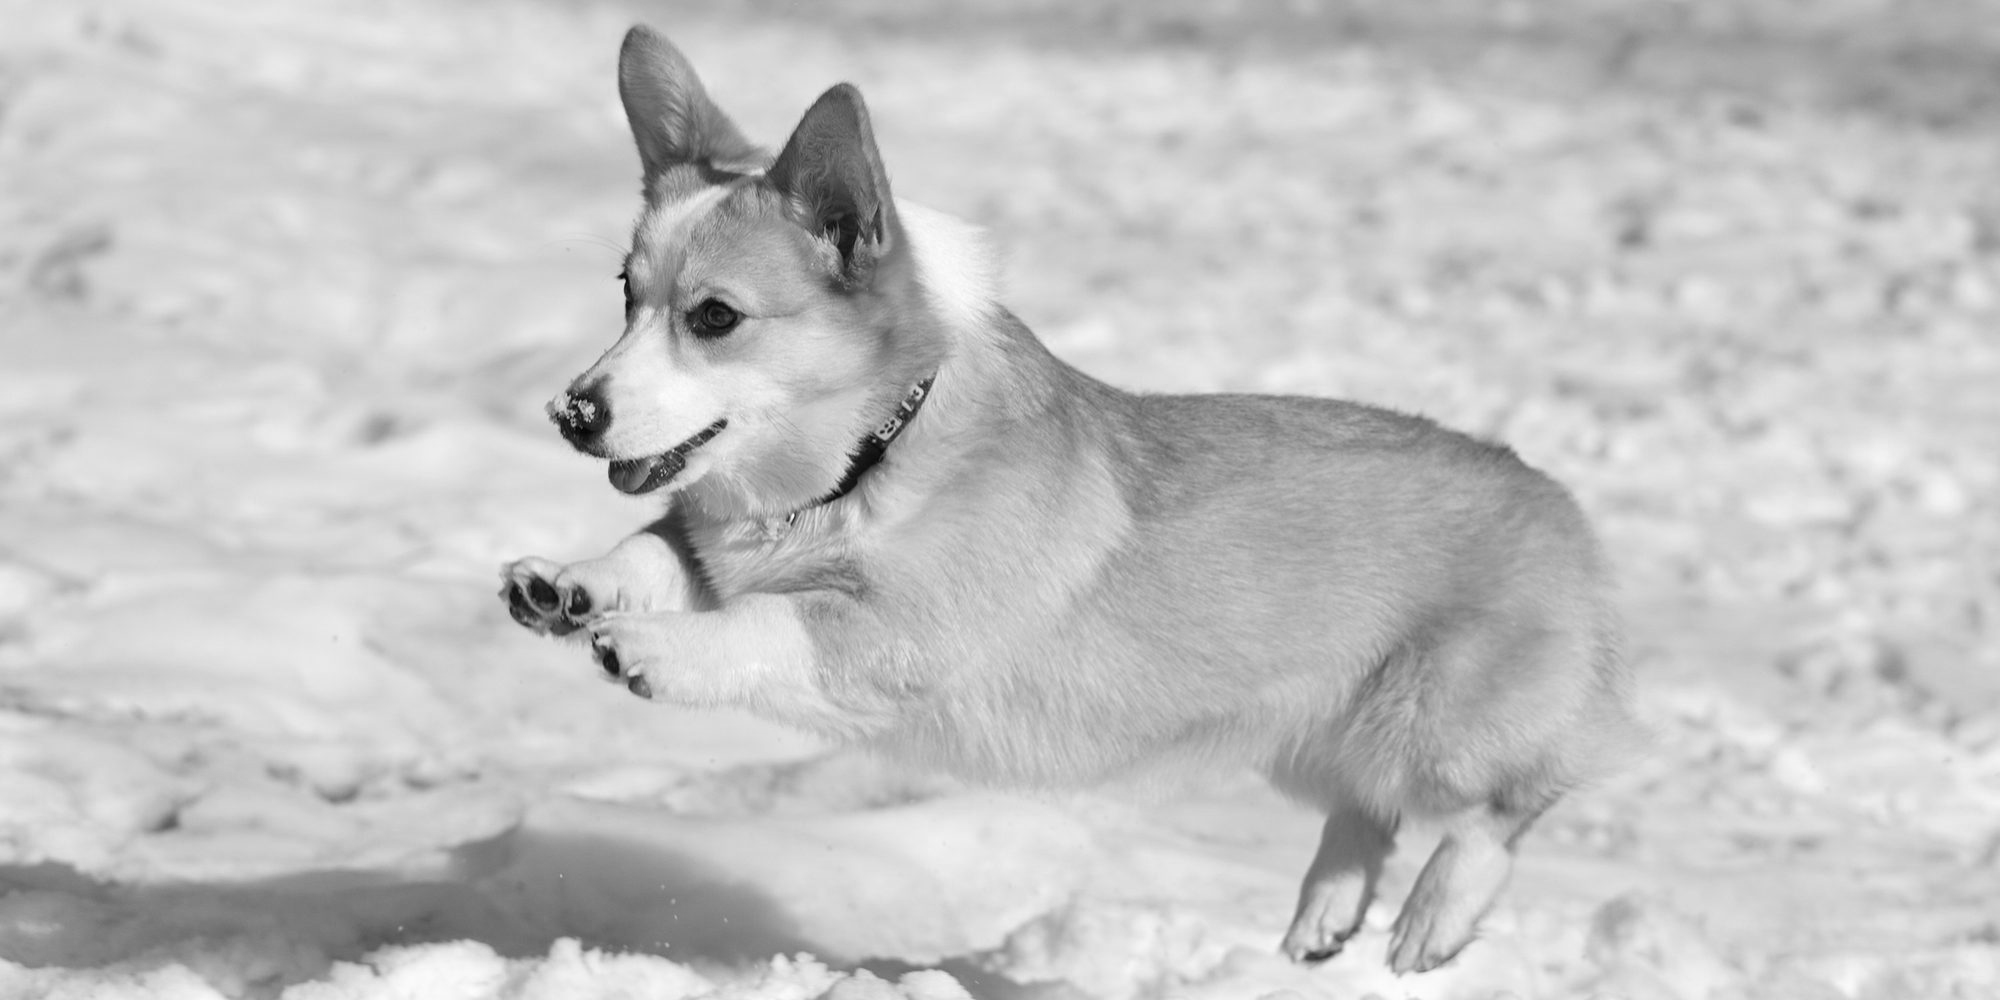

In [52]:
Image.fromarray(np.asarray(x.mean(axis=2), dtype=np.uint8))


In [53]:
y = x.mean(axis=2)
y

array([[220.66667, 220.66667, 220.66667, ..., 186.     , 186.     ,
        186.     ],
       [220.66667, 220.66667, 220.66667, ..., 186.     , 186.     ,
        186.     ],
       [220.66667, 220.66667, 220.66667, ..., 186.66667, 187.66667,
        187.66667],
       ...,
       [200.     , 200.     , 199.     , ..., 221.     , 222.     ,
        223.     ],
       [198.     , 198.     , 197.     , ..., 218.     , 220.     ,
        221.     ],
       [195.     , 196.     , 196.     , ..., 216.     , 218.     ,
        219.     ]], dtype=float32)

In [54]:
y.shape

(1000, 2000)

In [55]:
U, S, V = np.linalg.svd(y, full_matrices=False) #Матрица V транспонирована автоматически

In [56]:
U.shape

(1000, 1000)

In [57]:
V.shape

(1000, 2000)

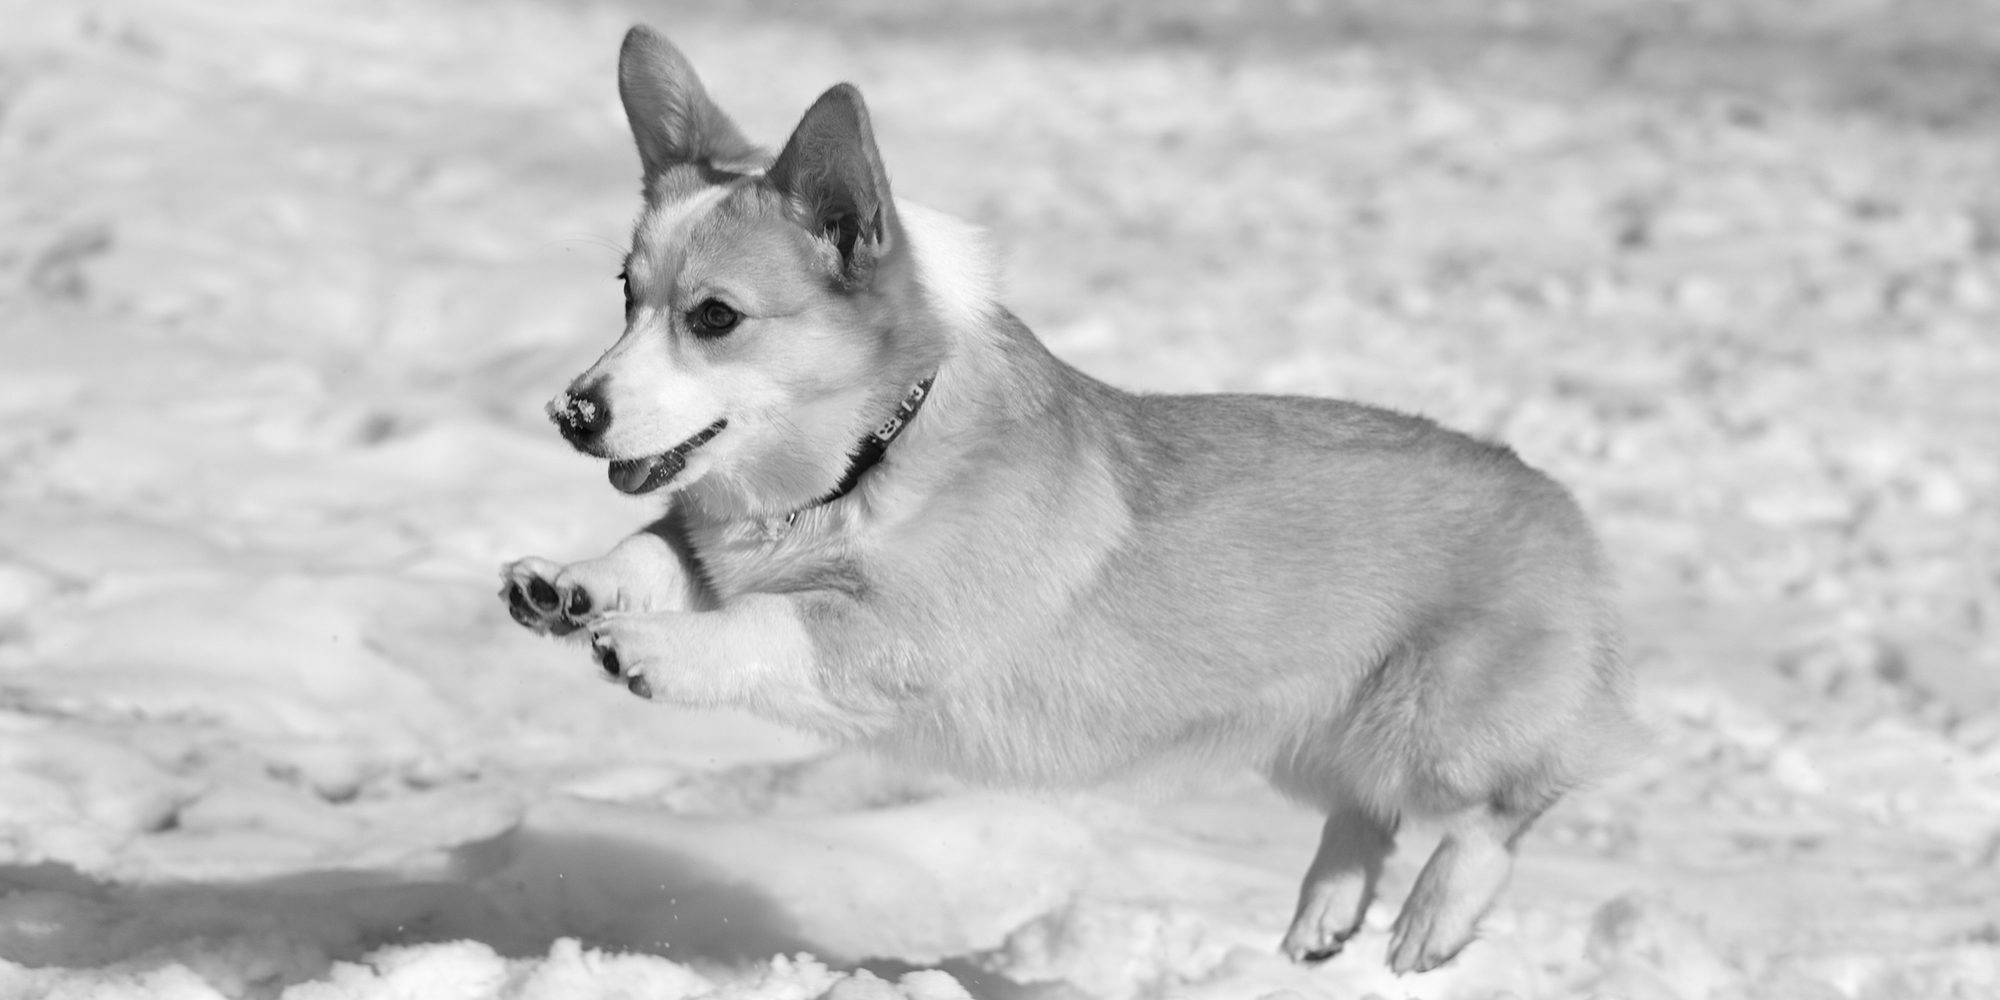

In [58]:
Y_full = U.dot(np.diag(S)).dot(V)
Image.fromarray(np.asarray(Y_full, dtype=np.uint8))

ДОМАШНЕЕ ЗАДАНИЕ №6


1. Рассмотрим малоранговое разложение. Напишем цикл, который позволит рассмотреть исходную картинку в разном качестве.
С помощью данного кода я получила картинки для разного значения ранга и созранила несколько картинок (картинки находятся в папке homework06 в этом же репозитории).

In [61]:
YY = []
for r in range(1, 100, 10):
    Y_r = U[:,:r].dot(np.diag(S[:r])).dot(V[:r,:])
    Y_r[Y_r < 0] = 0
    Y_r[Y_r > 255] = 255
    Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')
    YY.append(Y_r)

In [62]:
YY[-1].min()

0.0

In [63]:
YY[-1].argmin()

862589

In [64]:
YY[-1].max()

255.0

In [66]:
YY[-1][862589 // 2000, 862589 % 2000]

0.0

In [67]:
np.asarray(YY[-1], dtype=np.uint8)[862589 // 2000, 862589 % 2000]

0

ВЫВОДЫ ПО СИНГУЛЯРНОМУ РАЗЛОЖЕНИЮ:

In [6]:
print ("В данной работе я познакомилась с Сингулярным разложением!\
Сингулярное разложение — декомпозиция вещественной матрицы с целью ее приведения к каноническому виду.\
Ключевым моментом в моей работе - рассмотреть, как сингулярное разложение позволяет уменьшить память сохраняемой картинки\
за счёт значительного ухудшения её качества!\
Рассмотрела также малоранговое разложение, которое значительно упрощает операцию умножения матриц, которое применялось в\
сингулярном разложении!")

В данной работе я познакомилась с Сингулярным разложением!Сингулярное разложение — декомпозиция вещественной матрицы с целью ее приведения к каноническому виду.Ключевым моментом в моей работе - рассмотреть, как сингулярное разложение позволяет уменьшить память сохраняемой картинкиза счёт значительного ухудшения её качества!Рассмотрела также малоранговое разложение, которое значительно упрощает операцию умножения матриц, которое применялось всингулярном разложении!
